In [10]:

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:

# Cargar datos
data_path = './preprocessed.csv'
data = pd.read_csv(data_path)

# Seleccionar solo columnas numéricas
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Tratar valores nulos: imputación por la media
imputer = SimpleImputer(strategy='mean')
numerical_data_imputed = imputer.fit_transform(numerical_data)

# Normalización de los datos
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data_imputed)


In [12]:

# Aplicar PCA
pca = PCA()
principal_components = pca.fit_transform(numerical_data_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

# Varianza explicada acumulativa
cumulative_variance = np.cumsum(explained_variance_ratio)


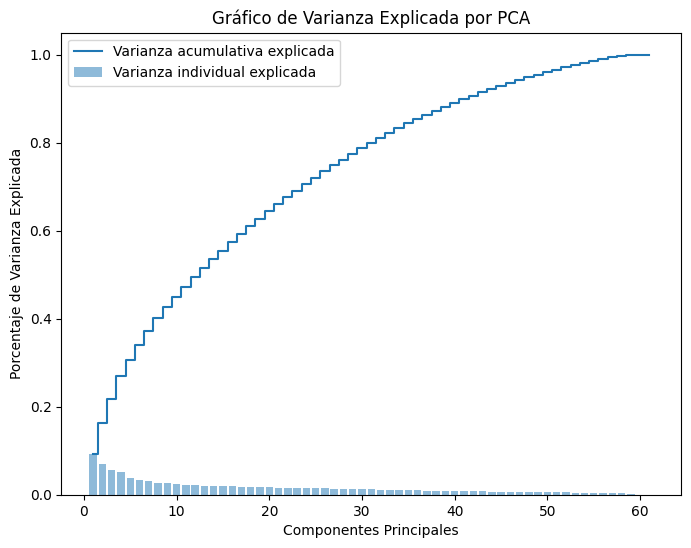

In [13]:

# Gráfica de varianza explicada
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center',
        label='Varianza individual explicada')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Varianza acumulativa explicada')
plt.ylabel('Porcentaje de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.legend(loc='best')
plt.title('Gráfico de Varianza Explicada por PCA')
plt.show()


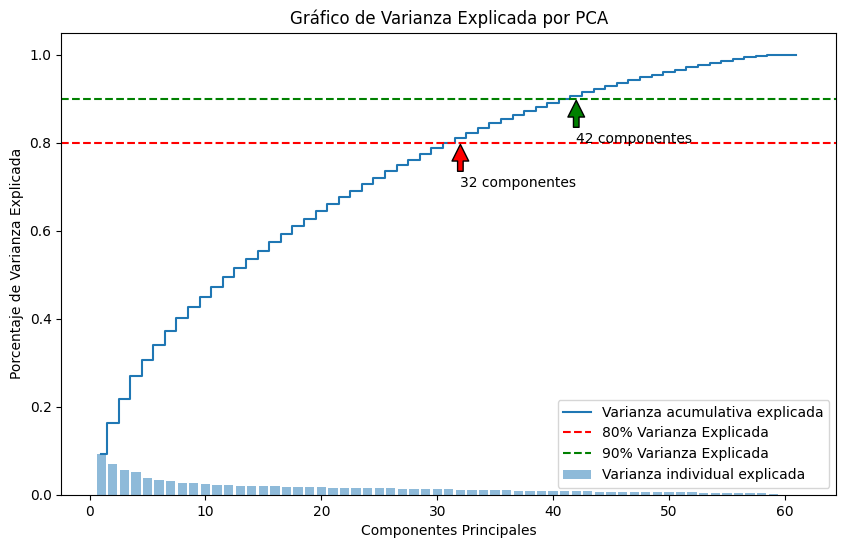

In [14]:
# Asumiendo que 'explained_variance_ratio' y 'cumulative_variance' ya están definidos
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center',
        label='Varianza individual explicada')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Varianza acumulativa explicada')

# Añadir líneas horizontales para el 80% y 90% de varianza explicada
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Varianza Explicada')
plt.axhline(y=0.9, color='g', linestyle='--', label='90% Varianza Explicada')

# Anotaciones para indicar el número de componentes necesarios para superar el 80% y 90%
n_components_80 = np.where(cumulative_variance >= 0.8)[0][0] + 1  # +1 porque el índice comienza en 0
n_components_90 = np.where(cumulative_variance >= 0.9)[0][0] + 1

plt.annotate(f'{n_components_80} componentes', xy=(n_components_80, 0.8),
             xytext=(n_components_80, 0.7), arrowprops=dict(facecolor='red', shrink=0.05))
plt.annotate(f'{n_components_90} componentes', xy=(n_components_90, 0.9),
             xytext=(n_components_90, 0.8), arrowprops=dict(facecolor='green', shrink=0.05))

plt.ylabel('Porcentaje de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.title('Gráfico de Varianza Explicada por PCA')
plt.legend(loc='best')
plt.show()

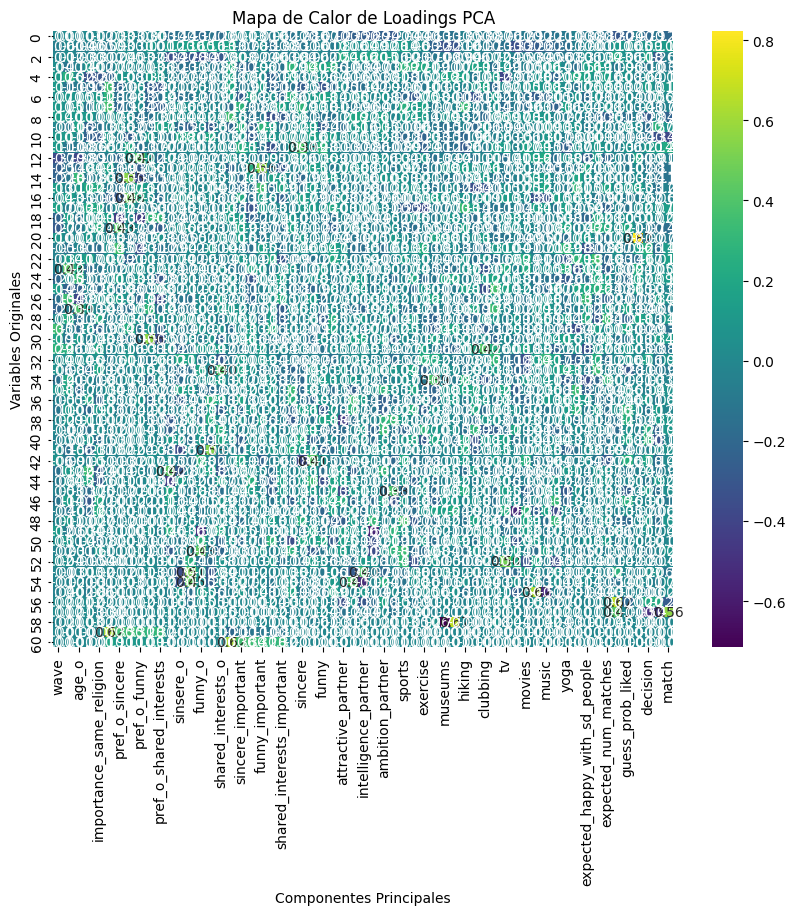

In [15]:

# Mapa de calor de los loadings
loadings = pd.DataFrame(pca.components_, columns=numerical_data.columns)
plt.figure(figsize=(10, 8))
sns.heatmap(loadings, cmap='viridis', annot=True, fmt=".2f")
plt.title('Mapa de Calor de Loadings PCA')
plt.xlabel('Componentes Principales')
plt.ylabel('Variables Originales')
plt.show()


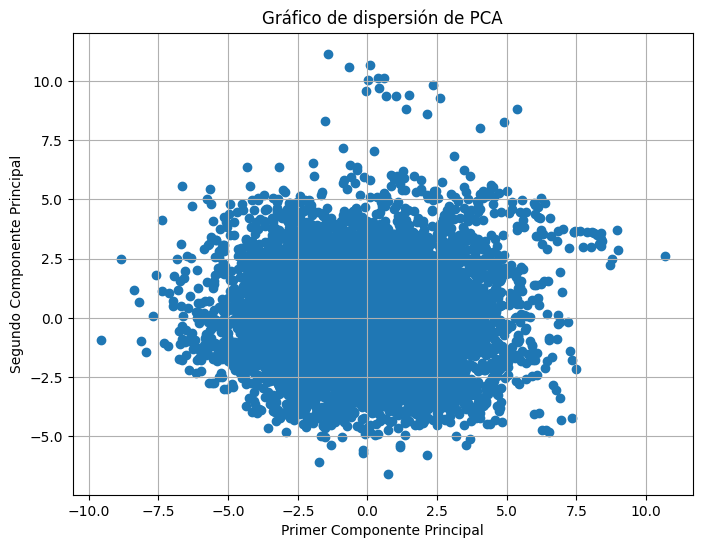

In [16]:
# Suponiendo que 'principal_components' es el resultado de tu PCA
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('Gráfico de dispersión de PCA')
plt.grid(True)
plt.show()


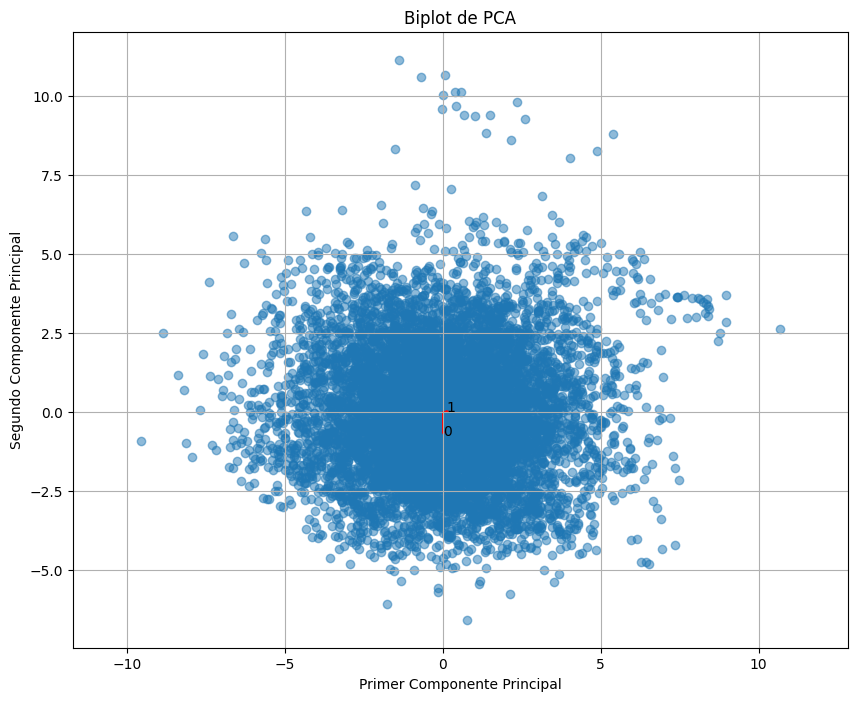

In [17]:
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
for i, v in enumerate(loadings.iloc[:, :2].T.values):
    plt.arrow(0, 0, v[0]*max(principal_components[:,0]), v[1]*max(principal_components[:,1]),
              color='red', width=0.005, head_width=0.05)
    plt.text(v[0]*max(principal_components[:,0])*1.2, v[1]*max(principal_components[:,1])*1.2,
             loadings.index[i], color='black')

plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('Biplot de PCA')
plt.grid(True)
plt.axis('equal')
plt.show()

In [18]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

ValueError: could not convert string to float: 'female'